# Import packages

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn import metrics
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

## Get list of S&P 500 stocks

In [2]:
# Get the list of S&P 500 stocks
sp500_stocks = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
print(sp500_stocks)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CM

In [3]:
# Set the start date and end date of previous data
date_today = str(datetime.date.today())
date_from_4_years = str(datetime.date.today() - datetime.timedelta(days=4*365))
date_yesterday = str(datetime.date.today() - datetime.timedelta(days=1))

## Get Historical Technical Data

In [4]:
# Loop through the first 5 tickers and get historical data
technical_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        # Get historical data for the current ticker from the past 2 years
        stock_historical_data = yf.download(stock, start=date_from_4_years, end=date_today, progress=False)
        # Add a new column for the stock symbol
        stock_historical_data['Symbol'] = stock
        technical_df = pd.concat([technical_df, stock_historical_data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Adham\AppData\Local\Temp\ipykernel_19264\704201189.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  technical_df = pd.concat([technical_df, stock_historical_data])

1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-12-07 -> 2023-12-06)')
C:\Users\Adham\AppData\Local\Temp\ipykernel_19264\704201189.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  technical_df = pd.concat([technical_df, stock_his

In [5]:
# Display the dataframe without breaking in separate line
pd.set_option('display.expand_frame_repr', False)

In [6]:
# Make "Date" a normal column instead of index as it has duplicates.
technical_df = technical_df.reset_index()

In [7]:
print(len(technical_df))

500003


In [8]:
print(technical_df.tail())

             Date        Open        High         Low       Close   Adj Close     Volume Symbol
499998 2023-11-29  177.869995  178.059998  175.240005  175.789993  175.789993  1524400.0    ZTS
499999 2023-11-30  175.039993  176.860001  173.630005  176.669998  176.669998  2581900.0    ZTS
500000 2023-12-01  176.250000  179.460007  175.979996  179.130005  179.130005  1367200.0    ZTS
500001 2023-12-04  178.809998  182.660004  178.809998  182.119995  182.119995  1559500.0    ZTS
500002 2023-12-05  181.289993  182.039993  178.860001  179.649994  179.649994  1425900.0    ZTS


In [9]:
print(technical_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')


## Get Yesterday's Technical Data

In [84]:
yesterday_technical_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        # Download technical data for yesterday
        data = yf.download(stock, start=date_yesterday, end=date_today, progress=False)
        data['Symbol'] = stock
        yesterday_technical_df = pd.concat([yesterday_technical_df, data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Adham\AppData\Local\Temp\ipykernel_17608\2924660089.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  yesterday_technical_df = pd.concat([yesterday_technical_df, data])

1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-27 -> 2023-10-28)')
C:\Users\Adham\AppData\Local\Temp\ipykernel_17608\2924660089.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  yesterday_technical_df = pd.concat([yesterda

In [119]:
yesterday_technical_df.reset_index(inplace=True)

In [85]:
print(len(yesterday_technical_df))

501


In [120]:
print(yesterday_technical_df.tail())

          Date        Open        High         Low       Close   Adj Close     Volume Symbol
496 2023-10-27  119.040001  120.250000  118.279999  119.440002  119.440002  2330633.0    YUM
497 2023-10-27  204.600006  207.559998  201.160004  207.179993  207.179993   565000.0   ZBRA
498 2023-10-27  104.000000  104.809998  102.709999  103.190002  103.190002  1534500.0    ZBH
499 2023-10-27   30.590000   30.670000   28.980000   29.450001   29.450001  2498300.0   ZION
500 2023-10-27  157.929993  157.932007  155.160004  156.029999  156.029999  2406212.0    ZTS


## Get Historical Fundamental Data

In [9]:
selected_income_statement_columns = ['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses']
selected_balance_sheet_columns = ['Total Debt', 'Total Capitalization', 'Total Assets']
selected_cash_flow_columns = ['Free Cash Flow', 'Capital Expenditure']

In [10]:
fundamental_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        stock_ticker = yf.Ticker(stock)
        # Get income statement
        income_statement = stock_ticker.income_stmt.transpose()
        # Get balance sheet
        balance_sheet = stock_ticker.balance_sheet.transpose()
        # Get cash flow
        cash_flow = stock_ticker.cash_flow.transpose()
        # Merge the different fundamental data sources
        stock_fundamental_data = pd.merge(income_statement[selected_income_statement_columns], balance_sheet[selected_balance_sheet_columns], left_index=True, right_index=True)
        stock_fundamental_data = pd.merge(stock_fundamental_data, cash_flow[selected_cash_flow_columns], left_index=True, right_index=True)
        # Add a new column for the stock symbol
        stock_fundamental_data['Symbol'] = stock
        stock_fundamental_data = stock_fundamental_data.resample('D').ffill()
        stock_fundamental_data = stock_fundamental_data[(stock_fundamental_data.index >= date_from_4_years) & (stock_fundamental_data.index <= date_today)]
        fundamental_df = pd.concat([fundamental_df, stock_fundamental_data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

Error retrieving data for AFL: "['Capital Expenditure'] not in index"
Error retrieving data for ARE: "['Capital Expenditure'] not in index"
Error retrieving data for LNT: "['Capital Expenditure'] not in index"
Error retrieving data for AXP: "['Total Expenses'] not in index"
Error retrieving data for AIG: "['Capital Expenditure'] not in index"
Error retrieving data for BAC: "['Total Expenses'] not in index"
Error retrieving data for BRK.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for BX: "['Total Expenses'] not in index"
Error retrieving data for BK: "['Total Expenses'] not in index"
Error retrieving data for BXP: "['Capital Expenditure'] not in index"
Error retrieving data for BF.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for COF: "['Total Expenses'] not in index"
Error retrieving data fo

In [11]:
# Rename index to be "Date" then convert it to a normal column as it has duplicates
fundamental_df.reset_index(inplace=True)
fundamental_df.rename(columns={'index': 'Date'}, inplace=True)
fundamental_df['Date'] = pd.to_datetime(fundamental_df['Date'])

In [12]:
print(len(fundamental_df))

496119


In [13]:
print(fundamental_df.tail())

             Date Basic EPS    Net Income Total Revenue Total Expenses    Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure Symbol
496114 2022-12-27      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
496115 2022-12-28      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
496116 2022-12-29      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
496117 2022-12-30      4.29  2037000000.0  7776000000.0   4973000000.0  6743000000.0        11135000000.0  13900000000.0   1736000000.0        -477000000.0    ZTS
496118 2022-12-31      4.51  2114000000.0  8080000000.0   5152000000.0  8090000000.0        10957000000.0  14925000000.0   1326000000.0        -586000000.0    ZTS


## Get Yesterday's Fundamental Data

In [121]:
yesterday_fundamental_df = pd.DataFrame()
for stock in sp500_stocks:
    try:
        stock_ticker = yf.Ticker(stock)
        # Get quarterly income statement
        quarterly_income_statement = stock_ticker.quarterly_incomestmt.transpose().head(1)
        # Get quarterly balance sheet
        quarterly_balance_sheet = stock_ticker.quarterly_balance_sheet.transpose().head(1)
        # Get quarterly cash flow
        quarterly_cash_flow = stock_ticker.quarterly_cashflow.transpose().head(1)
        # Merge the different fundamental data sources
        data = pd.merge(quarterly_income_statement[selected_income_statement_columns], quarterly_balance_sheet[selected_balance_sheet_columns], left_index=True, right_index=True)
        data = pd.merge(data, quarterly_cash_flow[selected_cash_flow_columns], left_index=True, right_index=True)
        # Add a new column for the stock symbol
        data['Symbol'] = stock
        data['Date'] = date_yesterday
        # Concat to the final dataframe
        yesterday_fundamental_df = pd.concat([yesterday_fundamental_df, data])
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

yesterday_fundamental_df.reset_index(inplace=True, drop=True)

Error retrieving data for AFL: "['Capital Expenditure'] not in index"
Error retrieving data for ARE: "['Capital Expenditure'] not in index"
Error retrieving data for LNT: "['Capital Expenditure'] not in index"
Error retrieving data for AXP: "['Total Expenses'] not in index"
Error retrieving data for AIG: "['Capital Expenditure'] not in index"
Error retrieving data for BAC: "['Total Expenses'] not in index"
Error retrieving data for BRK.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for BX: "['Total Expenses'] not in index"
Error retrieving data for BK: "['Total Expenses'] not in index"
Error retrieving data for BXP: "['Capital Expenditure'] not in index"
Error retrieving data for BF.B: "None of [Index(['Basic EPS', 'Net Income', 'Total Revenue', 'Total Expenses'], dtype='object')] are in the [columns]"
Error retrieving data for COF: "['Total Expenses'] not in index"
Error retrieving data fo

In [122]:
print(len(yesterday_fundamental_df))

428


In [123]:
print(yesterday_fundamental_df.tail())

    Basic EPS   Net Income Total Revenue Total Expenses     Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure Symbol        Date
423      0.45   92000000.0  1722000000.0   1575000000.0   2267000000.0        12166000000.0  16097000000.0    -26000000.0         -54000000.0    XYL  2023-10-27
424      1.49  418000000.0  1687000000.0   1125000000.0  11568000000.0         2758000000.0   5848000000.0    264000000.0         -60000000.0    YUM  2023-10-27
425       2.8  144000000.0  1214000000.0   1004000000.0   2365000000.0         5034000000.0   7456000000.0    -52000000.0         -18000000.0   ZBRA  2023-10-27
426       1.0  209600000.0  1869600000.0   1507600000.0   5709400000.0        17568000000.0  21294300000.0    177300000.0        -170600000.0    ZBH  2023-10-27
427      1.45  671000000.0  2180000000.0   1346000000.0   6745000000.0        11180000000.0  13749000000.0     17000000.0        -166000000.0    ZTS  2023-10-27


## Merge Technical and Fundamental Data

In [14]:
sp500_df = pd.merge(technical_df, fundamental_df, on=["Date", "Symbol"])

In [15]:
# Set index to Date column
sp500_df = sp500_df.set_index(['Date'])

In [16]:
print(sp500_df.head())

                  Open        High         Low       Close   Adj Close     Volume Symbol Basic EPS    Net Income  Total Revenue Total Expenses     Total Debt Total Capitalization   Total Assets Free Cash Flow Capital Expenditure
Date                                                                                                                                                                                                                                
2019-12-31  175.229996  176.589996  175.070007  176.419998  149.132568  1573500.0    MMM      7.92  4570000000.0  32136000000.0  26076000000.0  20560000000.0        27644000000.0  44659000000.0   5371000000.0       -1699000000.0
2020-01-02  177.679993  180.009995  177.139999  180.000000  152.158859  3601700.0    MMM      7.92  4570000000.0  32136000000.0  26076000000.0  20560000000.0        27644000000.0  44659000000.0   5371000000.0       -1699000000.0
2020-01-03  177.020004  178.660004  175.630005  178.449997  150.848572  2466900.0   

In [17]:
print(len(sp500_df))

340151


In [18]:
print(sp500_df.shape)

(340151, 16)


In [19]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340151 entries, 2019-12-31 to 2022-12-30
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Open                  340151 non-null  float64
 1   High                  340151 non-null  float64
 2   Low                   340151 non-null  float64
 3   Close                 340151 non-null  float64
 4   Adj Close             340151 non-null  float64
 5   Volume                340151 non-null  float64
 6   Symbol                340151 non-null  object 
 7   Basic EPS             340145 non-null  object 
 8   Net Income            340151 non-null  object 
 9   Total Revenue         340151 non-null  object 
 10  Total Expenses        340151 non-null  object 
 11  Total Debt            338132 non-null  object 
 12  Total Capitalization  340151 non-null  object 
 13  Total Assets          340151 non-null  object 
 14  Free Cash Flow        340151 non-nul

In [20]:
# Change data types from object to float
sp500_df['Basic EPS'] = sp500_df['Basic EPS'].astype('float64')
sp500_df['Net Income'] = sp500_df['Net Income'].astype('float64')
sp500_df['Total Revenue'] = sp500_df['Total Revenue'].astype('float64')
sp500_df['Total Expenses'] = sp500_df['Total Expenses'].astype('float64')
sp500_df['Total Debt'] = sp500_df['Total Debt'].astype('float64')
sp500_df['Total Capitalization'] = sp500_df['Total Capitalization'].astype('float64')
sp500_df['Total Assets'] = sp500_df['Total Assets'].astype('float64')
sp500_df['Free Cash Flow'] = sp500_df['Free Cash Flow'].astype('float64')
sp500_df['Capital Expenditure'] = sp500_df['Capital Expenditure'].astype('float64')

In [21]:
# Reorder columns
sp500_df = sp500_df[['Symbol', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Basic EPS', 
                     'Net Income', 'Total Revenue', 'Total Expenses', 'Total Debt', 'Total Capitalization', 
                     'Total Assets', 'Free Cash Flow', 'Capital Expenditure', 'Close']]

In [22]:
sp500_df.dtypes

Symbol                   object
Open                    float64
High                    float64
Low                     float64
Adj Close               float64
Volume                  float64
Basic EPS               float64
Net Income              float64
Total Revenue           float64
Total Expenses          float64
Total Debt              float64
Total Capitalization    float64
Total Assets            float64
Free Cash Flow          float64
Capital Expenditure     float64
Close                   float64
dtype: object

In [23]:
sp500_df.describe()

,Open,High,Low,Adj Close,Volume,Basic EPS,Net Income,Total Revenue,Total Expenses,Total Debt,Total Capitalization,Total Assets,Free Cash Flow,Capital Expenditure,Close
count,340151.000000,340151.000000,340151.000000,340151.000000,3.401510e+05,340145.000000,3.401510e+05,3.401510e+05,3.401510e+05,3.381320e+05,3.401510e+05,3.401510e+05,3.401510e+05,3.401510e+05,340151.000000
mean,168.614622,170.866323,166.308154,164.282808,5.268390e+06,5.996687,2.463598e+09,2.634202e+10,2.288685e+10,1.356015e+10,2.446085e+10,4.277994e+10,2.690572e+09,-1.649867e+09,168.612243
std,279.963593,283.791141,276.115508,279.558785,1.339759e+07,16.474141,7.096910e+09,5.244132e+10,4.779039e+10,2.122932e+10,3.678641e+10,6.364719e+10,7.368084e+09,4.192573e+09,279.985812
min,3.220000,3.290000,3.020000,2.971902,0.000000e+00,-28.590000,-2.244000e+10,4.803600e+07,4.730100e+07,3.230000e+05,-4.349894e+09,7.132230e+08,-2.834300e+10,-6.788200e+10,3.120000
25%,57.700001,58.480000,56.900002,54.094564,9.140000e+05,1.890000,4.512950e+08,4.798000e+09,3.868400e+09,2.842962e+09,5.704000e+09,9.344700e+09,5.034210e+08,-1.368000e+09,57.700001
50%,105.910004,107.379997,104.410004,101.691406,1.925100e+06,3.950000,9.654600e+08,1.047900e+10,8.639000e+09,6.611000e+09,1.223530e+10,2.049230e+10,1.097000e+09,-4.610000e+08,105.919998
75%,198.539993,201.130005,195.910004,192.052200,4.454800e+06,6.920000,2.260000e+09,2.139000e+10,1.818000e+10,1.475900e+10,2.625600e+10,4.726339e+10,2.556000e+09,-1.630000e+08,198.600006
max,5977.609863,5982.450195,5884.060059,5959.330078,9.140820e+08,345.370000,9.980300e+10,6.112890e+11,5.908610e+11,1.999560e+11,3.359300e+11,5.519510e+11,1.114430e+11,-2.505000e+06,5959.330078


# Check Null Values

In [24]:
print(sp500_df.isnull().sum())

Symbol                     0
Open                       0
High                       0
Low                        0
Adj Close                  0
Volume                     0
Basic EPS                  6
Net Income                 0
Total Revenue              0
Total Expenses             0
Total Debt              2019
Total Capitalization       0
Total Assets               0
Free Cash Flow             0
Capital Expenditure        0
Close                      0
dtype: int64


# Drop Null Values

In [25]:
sp500_df.dropna(inplace=True)

# Check Duplicates

In [26]:
sp500_df.duplicated().sum()

0

# Select a stock for analysis

In [27]:
selected_stock_df = sp500_df[sp500_df['Symbol'] == 'AAPL']
# Drop Symbol column as it is no longer needed and it will cause errors in the plots
selected_stock_df.drop(columns='Symbol', inplace=True)

C:\Users\Adham\AppData\Local\Temp\ipykernel_19264\2038683063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stock_df.drop(columns='Symbol', inplace=True)


In [28]:
print(selected_stock_df.head())

                  Open        High         Low   Adj Close       Volume  Basic EPS    Net Income  Total Revenue  Total Expenses    Total Debt  Total Capitalization  Total Assets  Free Cash Flow  Capital Expenditure       Close
Date                                                                                                                                                                                                                              
2020-09-30  113.790001  117.260002  113.620003  113.604179  142675200.0       3.31  5.741100e+10   2.745150e+11    2.082270e+11  1.124360e+11          1.640060e+11  3.238880e+11    7.336500e+10        -7.309000e+09  115.809998
2020-10-01  117.639999  117.720001  115.830002  114.565529  116120400.0       3.31  5.741100e+10   2.745150e+11    2.082270e+11  1.124360e+11          1.640060e+11  3.238880e+11    7.336500e+10        -7.309000e+09  116.790001
2020-10-02  112.889999  115.370003  112.220001  110.867310  144712000.0       3.31  5.741100

# Univariate Analysis

In [29]:
def plot_columns(df):
    fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(12,10))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        ax.set_title(df.columns[i])
        ax.tick_params(labelsize=6)

    plt.tight_layout()

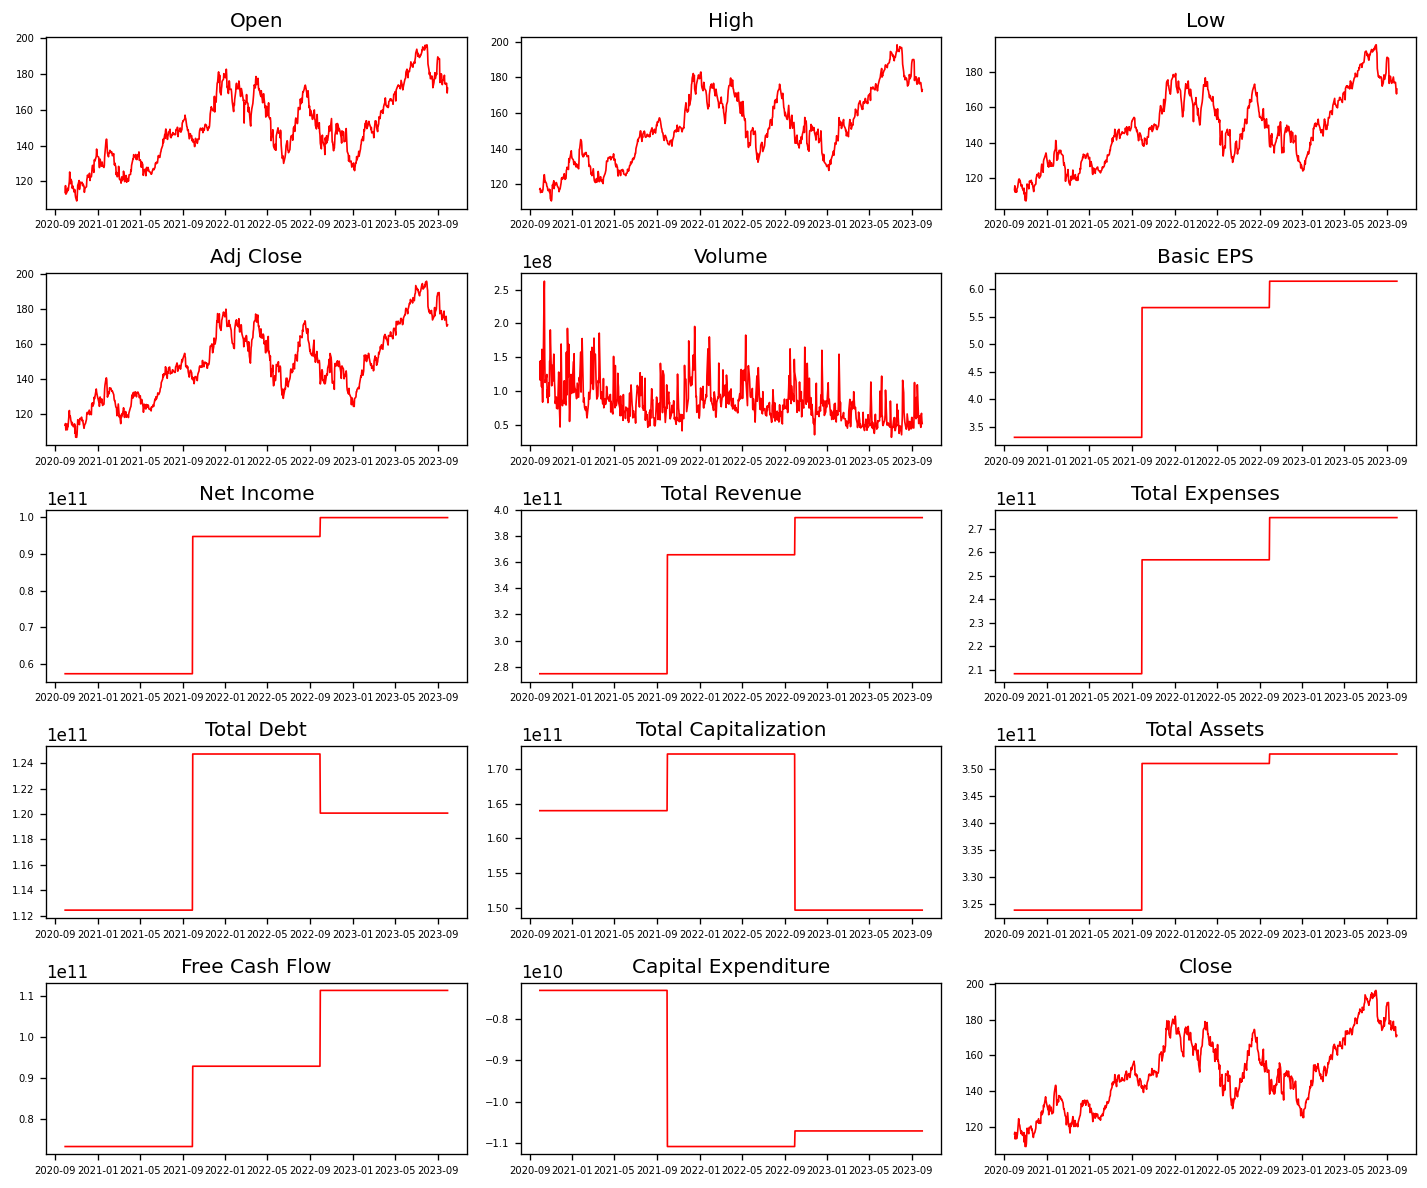

In [31]:
plot_columns(selected_stock_df)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Basic EPS'}>,
        <Axes: title={'center': 'Net Income'}>,
        <Axes: title={'center': 'Total Revenue'}>],
       [<Axes: title={'center': 'Total Expenses'}>,
        <Axes: title={'center': 'Total Debt'}>,
        <Axes: title={'center': 'Total Capitalization'}>,
        <Axes: title={'center': 'Total Assets'}>],
       [<Axes: title={'center': 'Free Cash Flow'}>,
        <Axes: title={'center': 'Capital Expenditure'}>,
        <Axes: title={'center': 'Close'}>, <Axes: >]], dtype=object)

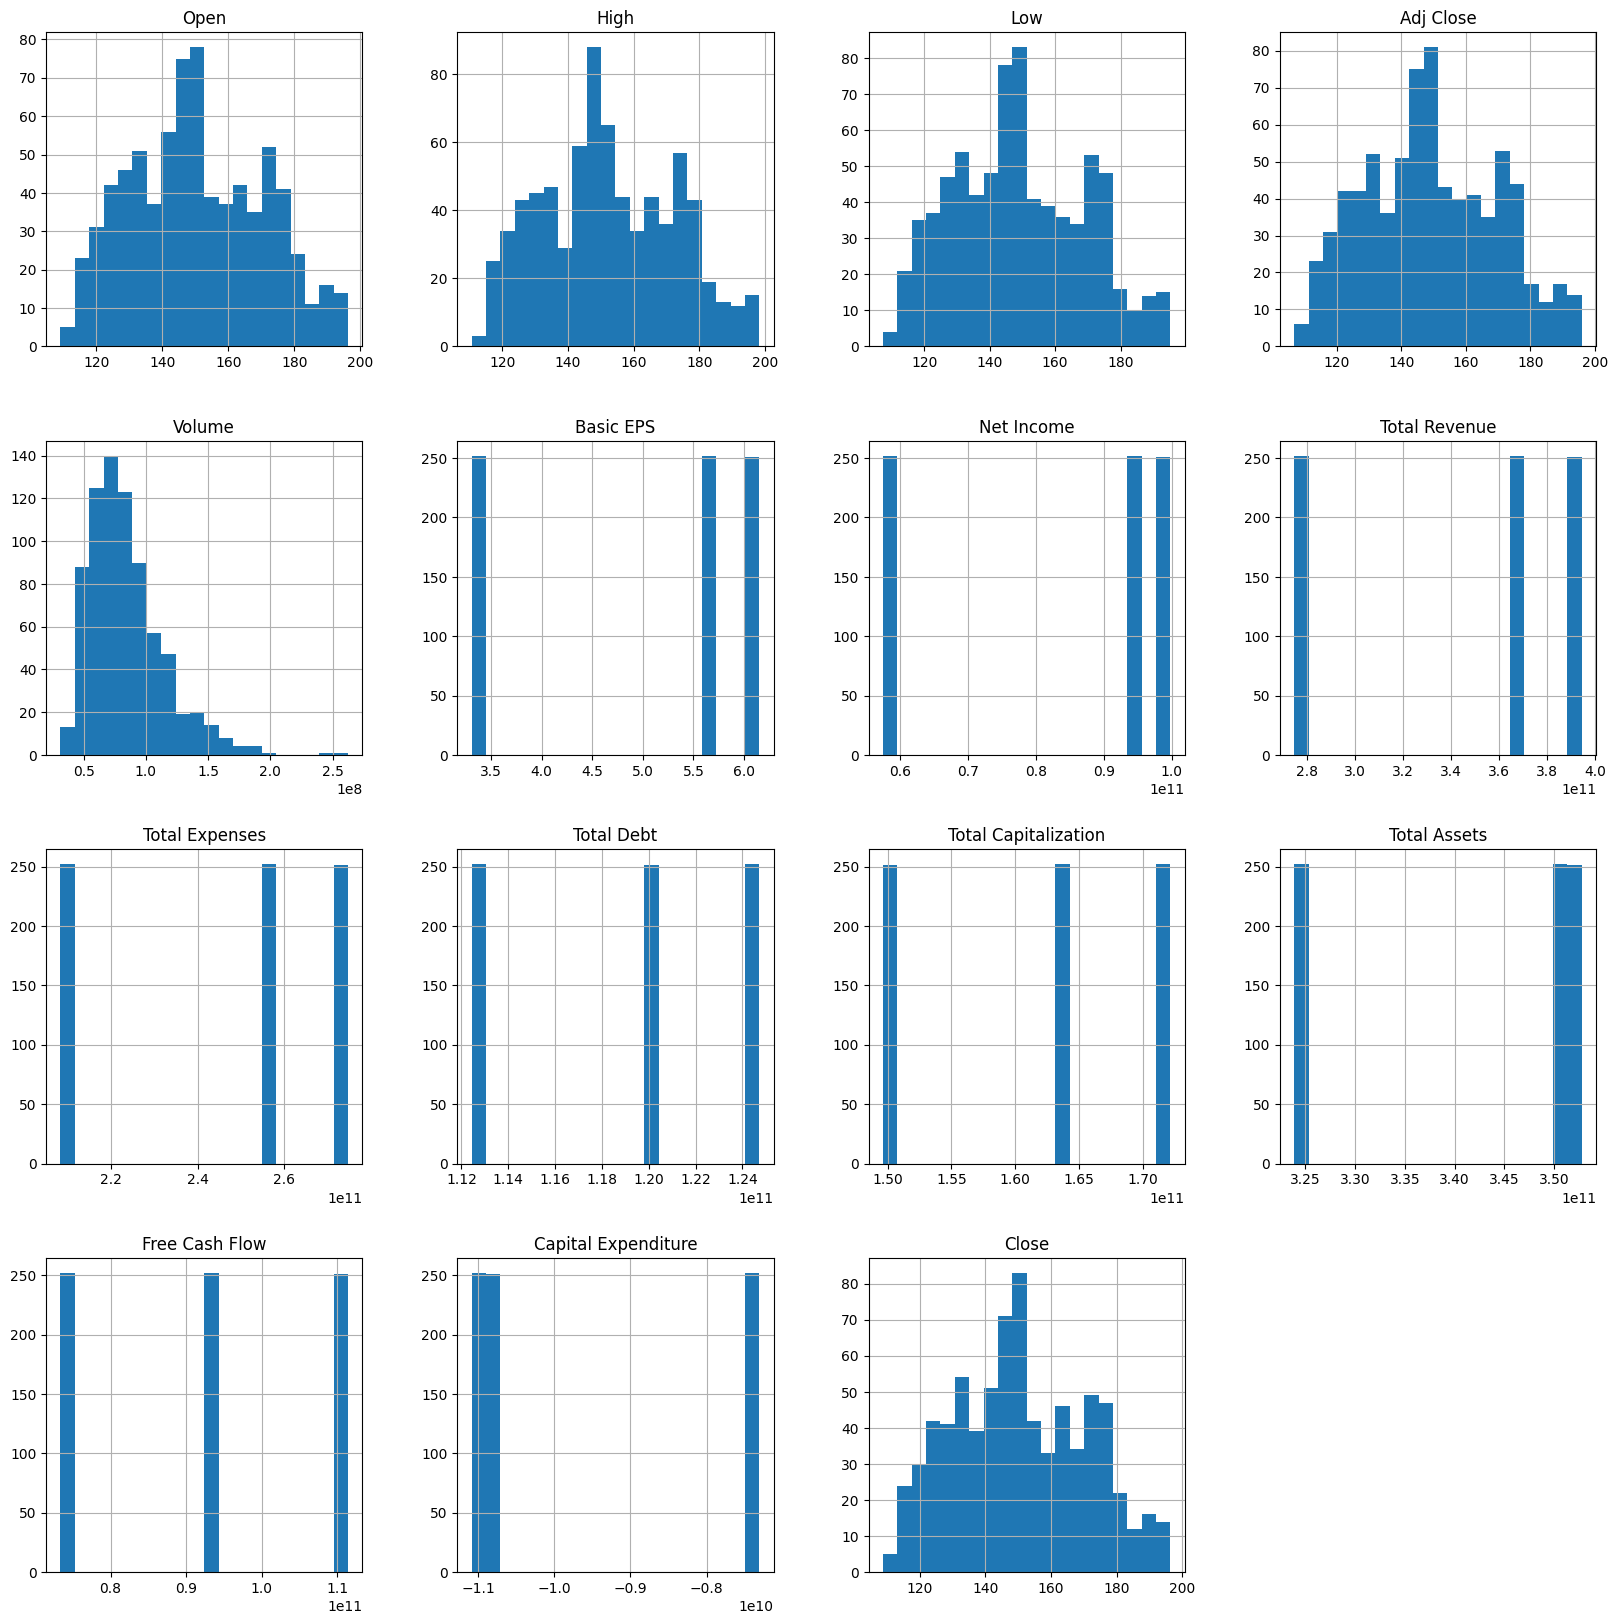

In [32]:
# Plot histograms for all the columns in the Google dataframe
selected_stock_df.hist(bins=20, figsize=(20, 20))

# Bivariate Analysis

## Granger’s Causality Test

In [33]:
# The rows of the output are the response variables, while the columns are the predoctors.
# The values are called P-Values, p-value < 0.05 means that X does not cause Y.
def granger_causation_matrix(data):    
    test = 'ssr_chi2test'
    verbose=False
    maxlag=12
    columns = data.columns
    df = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in columns]
    df.index = [var + '_y' for var in columns]
    return df

granger_causation_matrix(selected_stock_df) 

c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python311\Lib\site-packages\sta

,Open_x,High_x,Low_x,Adj Close_x,Volume_x,Basic EPS_x,Net Income_x,Total Revenue_x,Total Expenses_x,Total Debt_x,Total Capitalization_x,Total Assets_x,Free Cash Flow_x,Capital Expenditure_x,Close_x
Open_y,1.0000,0.0000,0.0000,0.0000,0.0438,0.0788,0.0842,0.0734,0.0718,0.2856,0.0270,0.0930,0.0695,0.1290,0.0000
High_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.1094,0.1170,0.1016,0.0991,0.3598,0.3845,0.1288,0.1016,0.1752,0.0000
Low_y,0.0000,0.0000,1.0000,0.0000,0.0542,0.1196,0.1297,0.1083,0.1042,0.0870,0.0035,0.1449,0.0973,0.1969,0.0000
Adj Close_y,0.0842,0.1051,0.1022,1.0000,0.1056,0.0614,0.0671,0.0556,0.0538,0.2438,0.1141,0.0761,0.0560,0.1135,0.0836
Volume_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0489,0.0000,0.0000,0.0000,0.0005,0.0000
Basic EPS_y,0.5318,0.5440,0.5069,0.4512,0.1785,1.0000,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.9645,0.4550
Net Income_y,0.5217,0.5001,0.5021,0.4630,0.1806,0.9830,1.0000,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.9830,0.4663
Total Revenue_y,0.4629,0.6147,0.4252,0.4152,0.1412,0.9236,0.9236,1.0000,0.9236,0.9236,0.9236,0.9236,0.9236,0.9236,0.4193
Total Expenses_y,0.4286,0.5718,0.3825,0.3900,0.1255,0.8979,0.8979,0.8979,1.0000,0.8979,0.8979,0.8979,0.8979,0.8979,0.3942
Total Debt_y,0.3926,0.3516,0.3247,0.3235,0.0660,0.8514,0.8514,0.8514,0.8514,1.0000,0.8514,0.8514,0.8514,0.8514,0.3193


## Scatter Plot between features and target

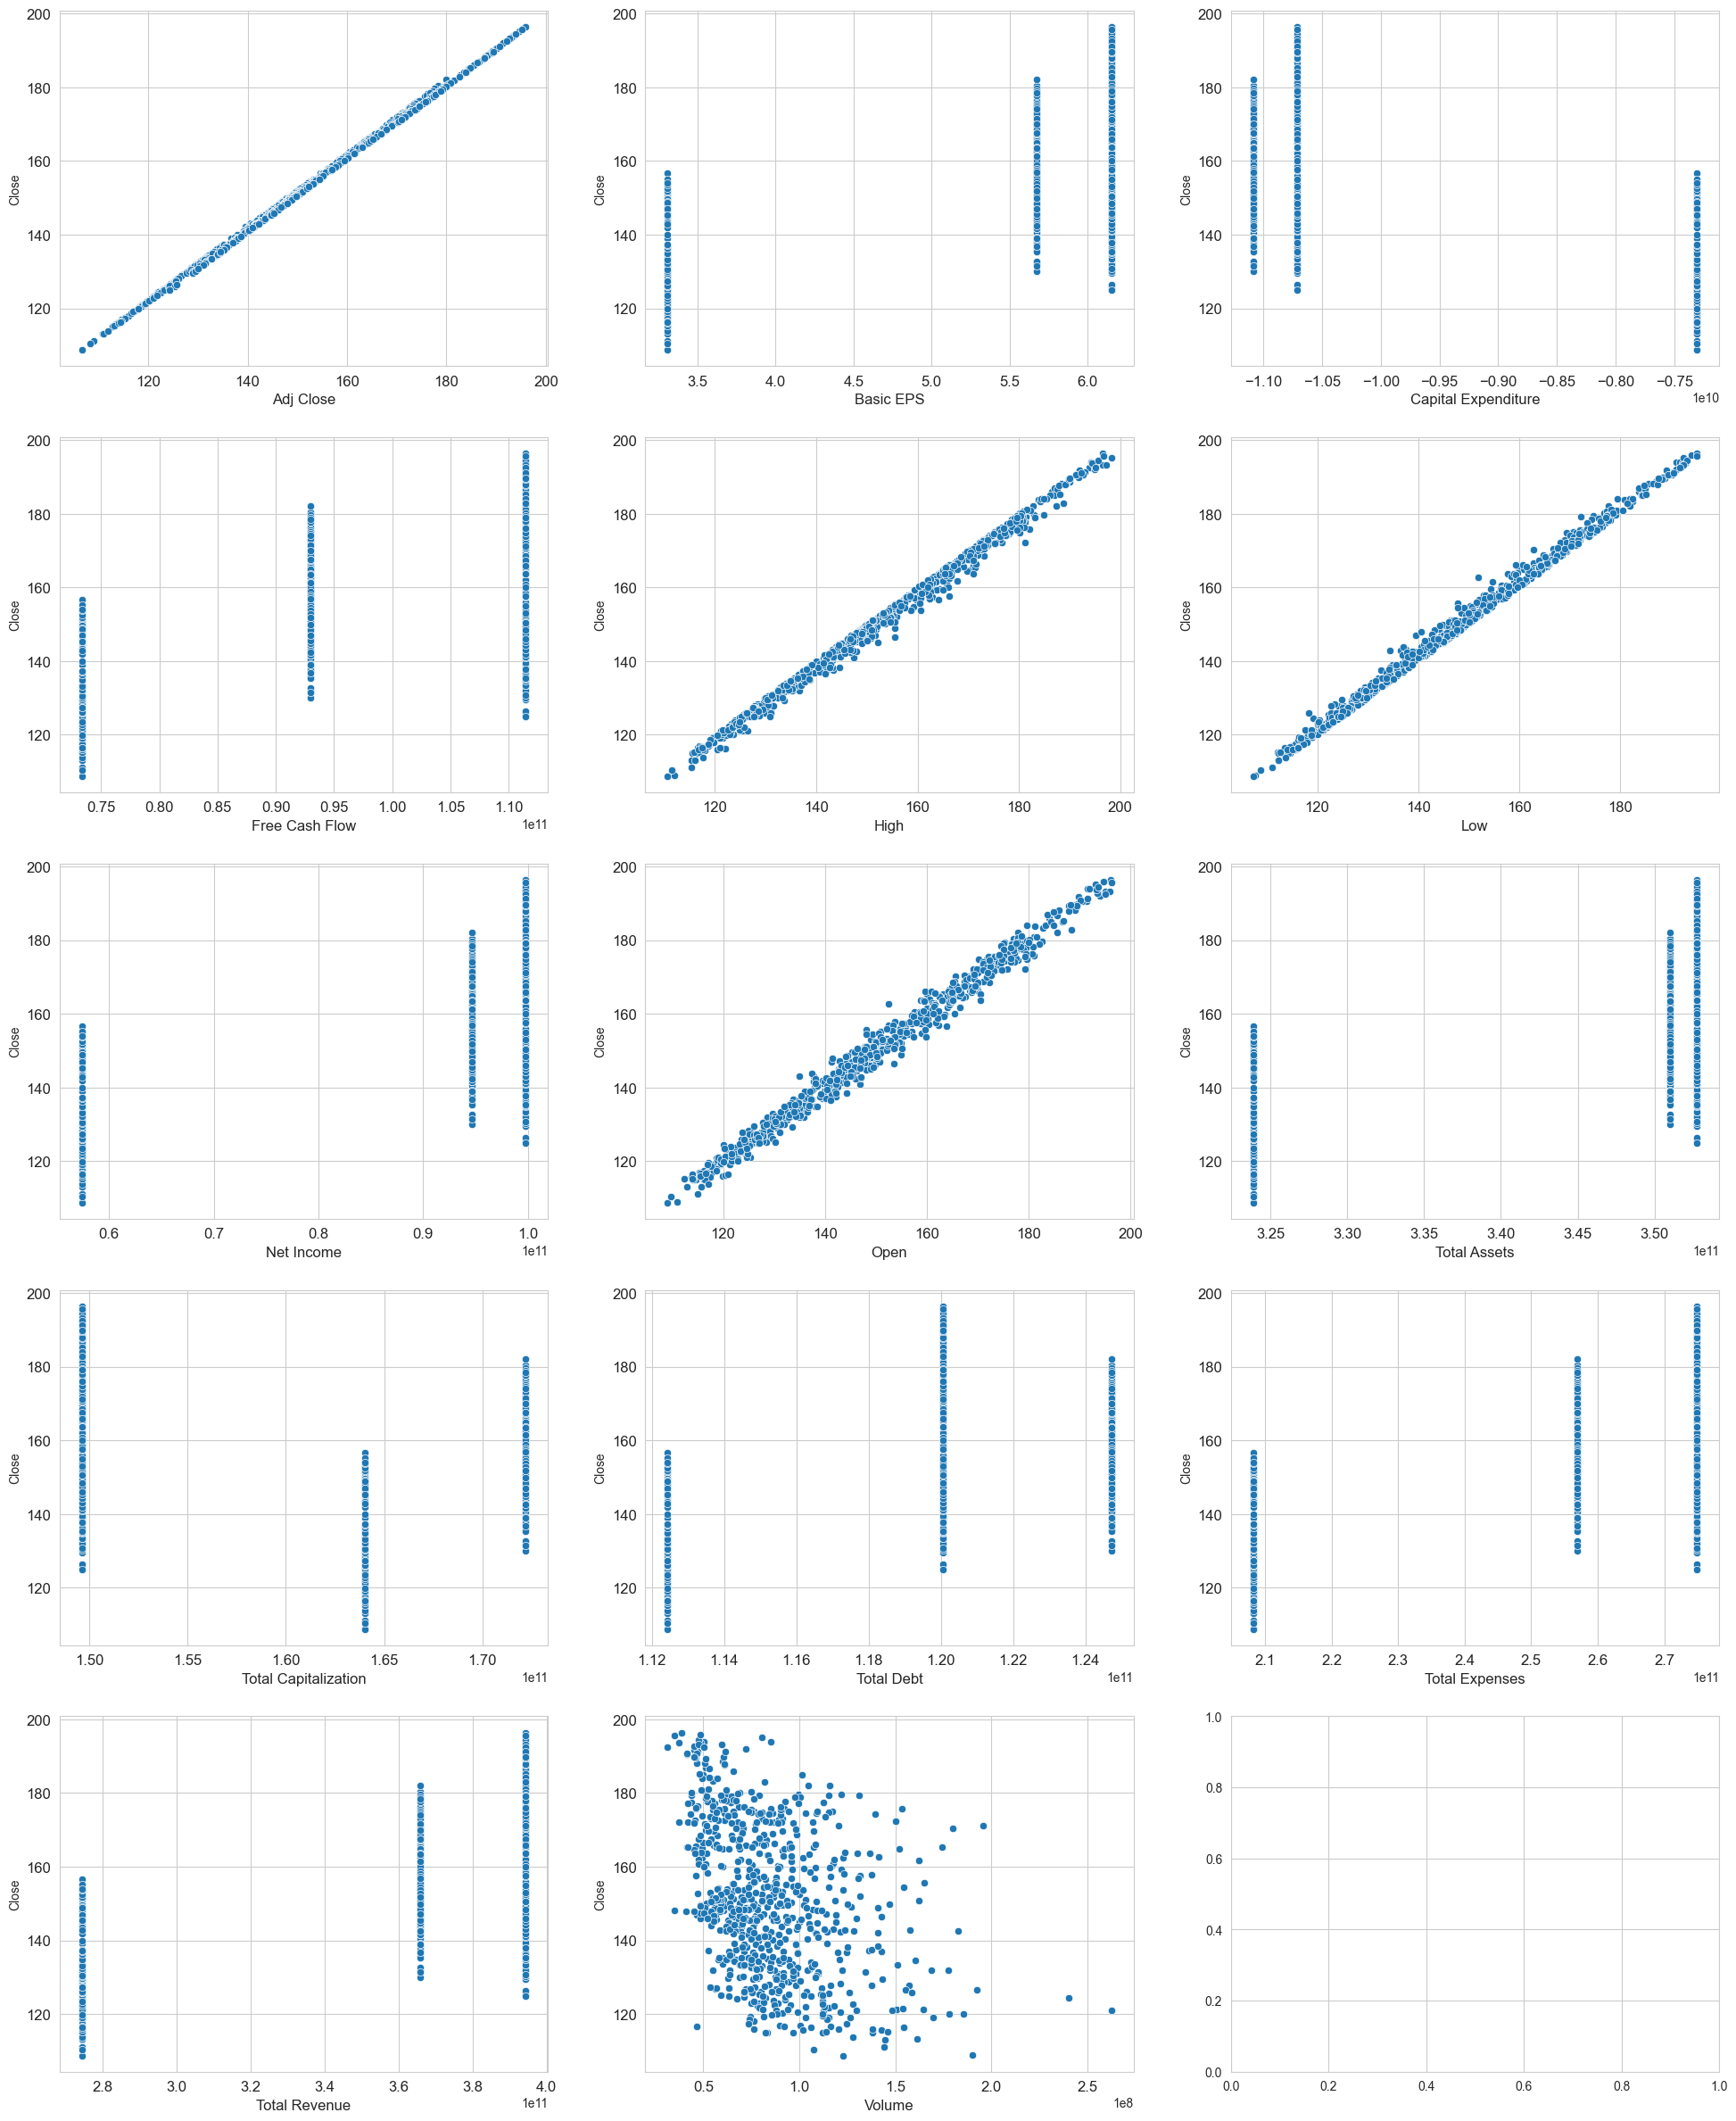

In [34]:
features = selected_stock_df.columns.difference(['Close']).values
i = 0
sns.set_style('whitegrid')
fig, ax = plt.subplots(5,3,figsize=(24,30))

for feature in features:
    i += 1
    plt.subplot(5,3,i)
    sns.scatterplot(x=feature, y='Close', data=selected_stock_df[[feature, 'Close']])
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

# Multivariate Analysis

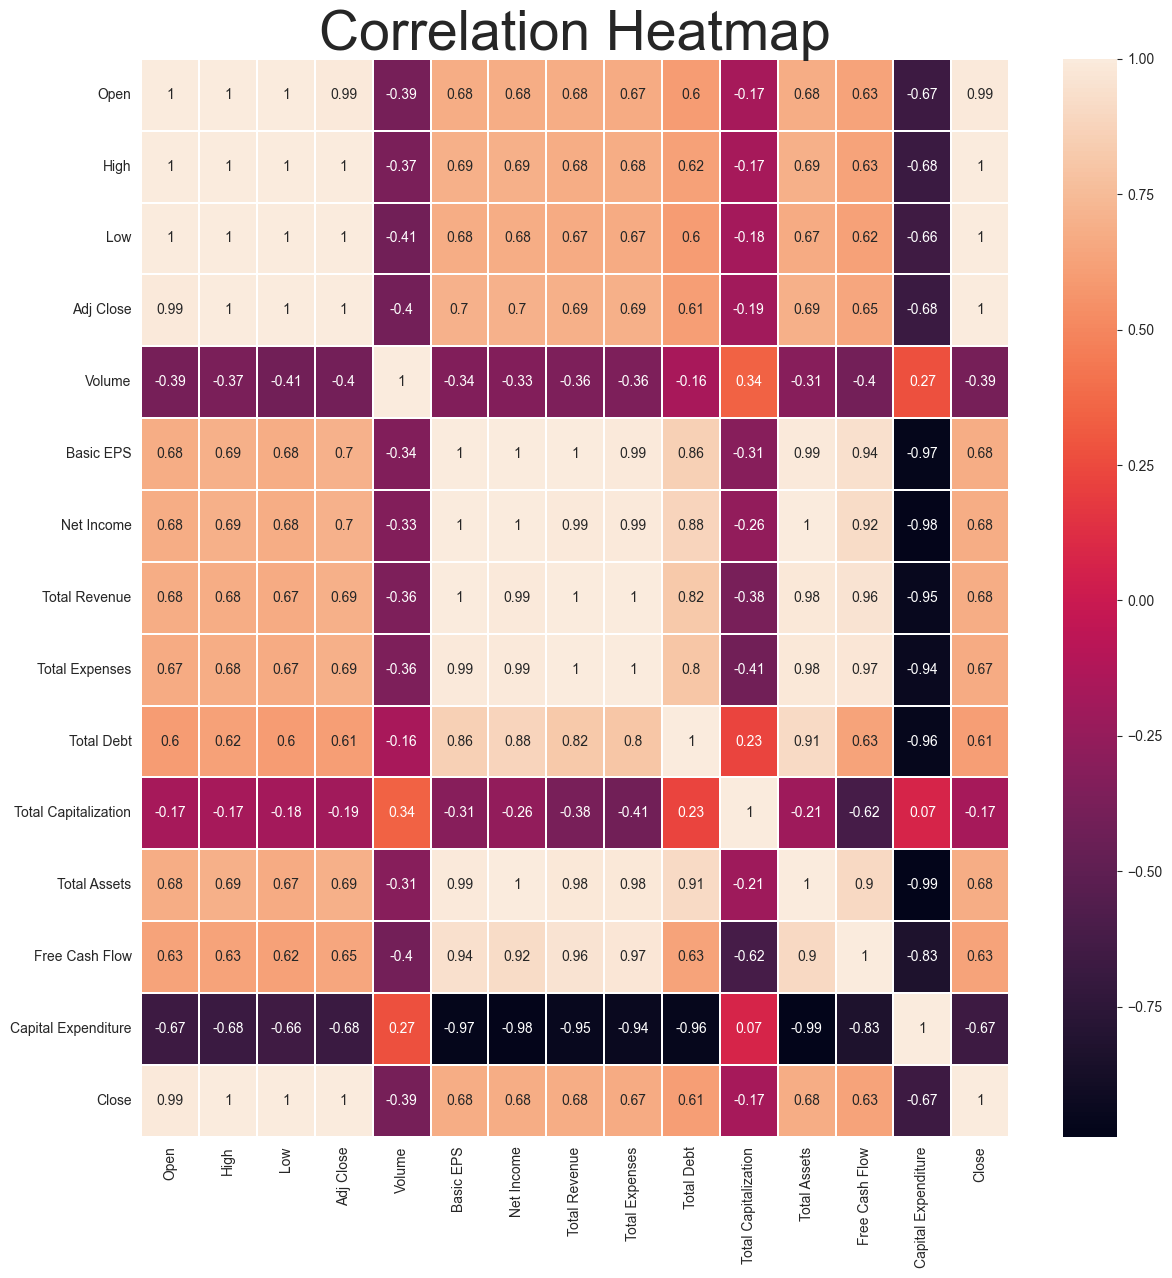

In [35]:
# Correlation between columns using Pearson method
corr = selected_stock_df.corr().round(2)
fig, ax = plt.subplots(figsize=(14,14))
s = sns.heatmap(corr, annot=True, linewidths=0.1, ax=ax)
s.set_title('Correlation Heatmap', fontsize=40)
plt.show()

# Drop columns with correlation coefficient < 0.5

In [36]:
threshold = 0.5
target_column = "Close"
correlation_coefficients = selected_stock_df.corr()[target_column]
columns_to_drop = correlation_coefficients[abs(correlation_coefficients) < threshold].index
selected_stock_df = selected_stock_df.drop(columns=columns_to_drop)

In [37]:
print(selected_stock_df.columns)

Index(['Open', 'High', 'Low', 'Adj Close', 'Basic EPS', 'Net Income',
       'Total Revenue', 'Total Expenses', 'Total Debt', 'Total Assets',
       'Free Cash Flow', 'Capital Expenditure', 'Close'],
      dtype='object')


# Outliers

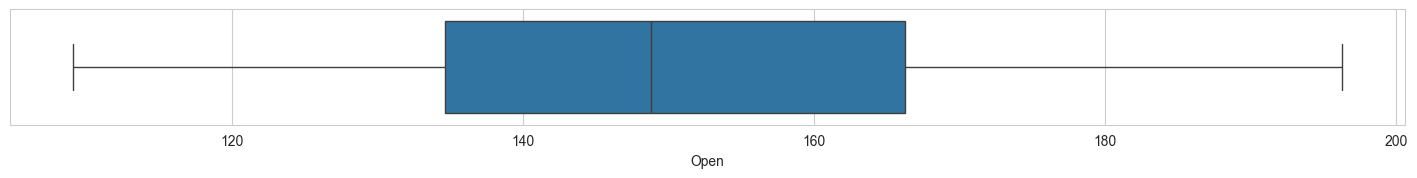

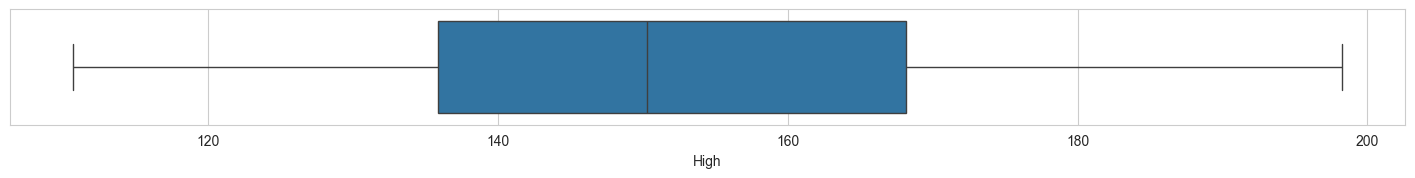

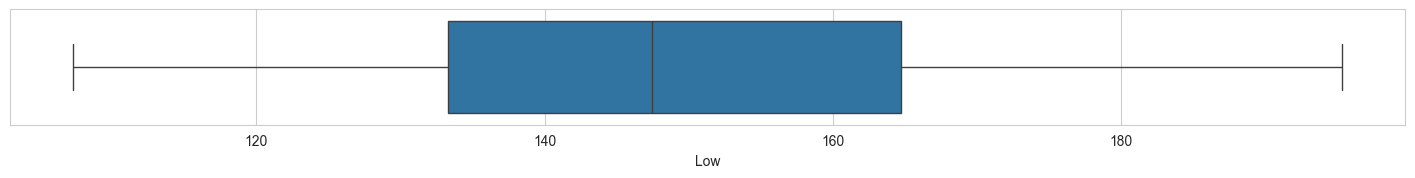

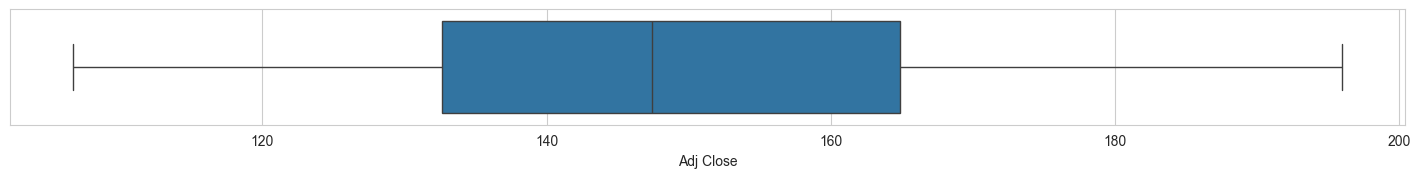

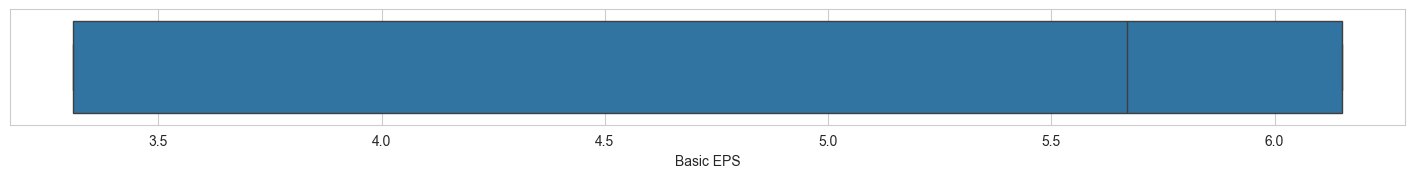

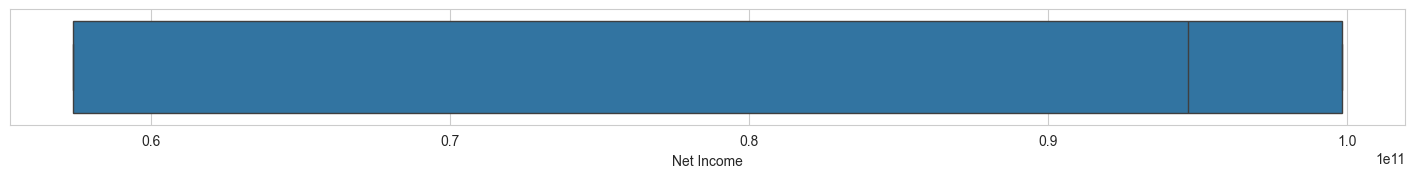

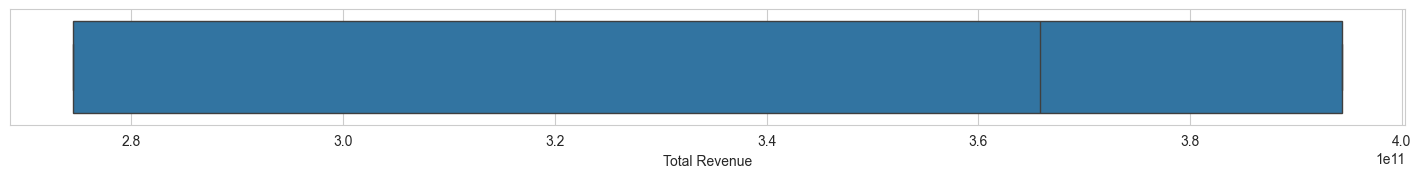

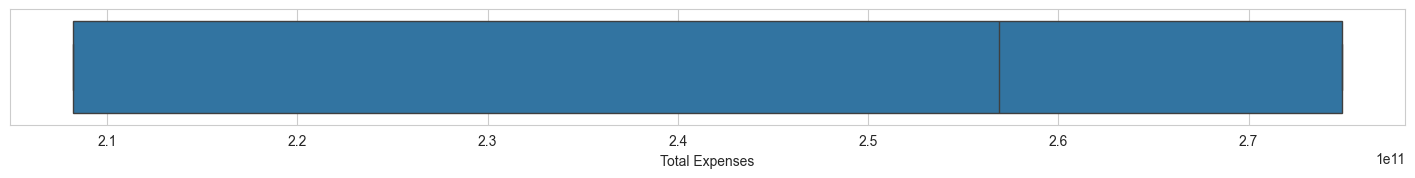

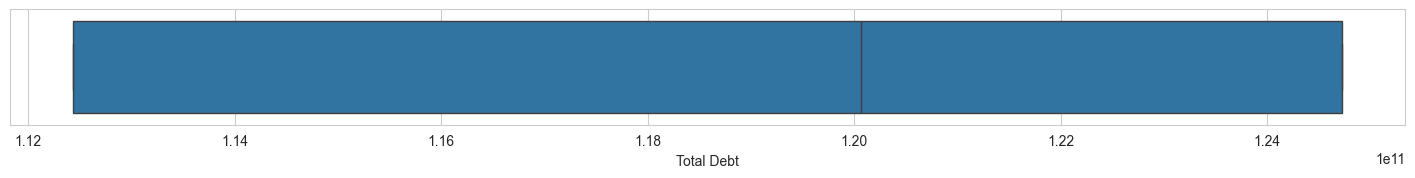

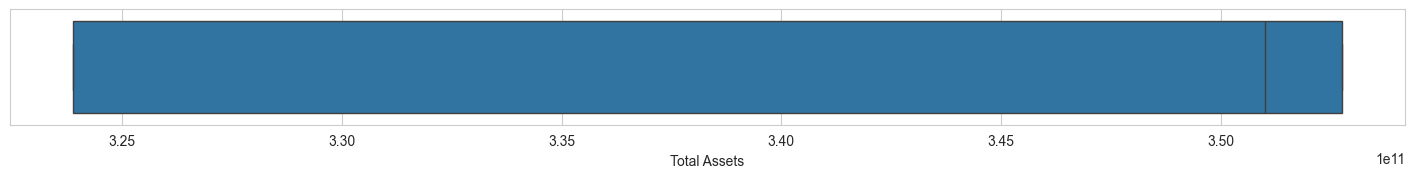

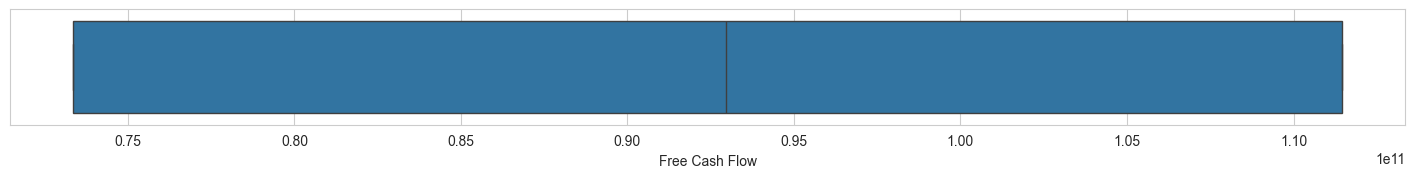

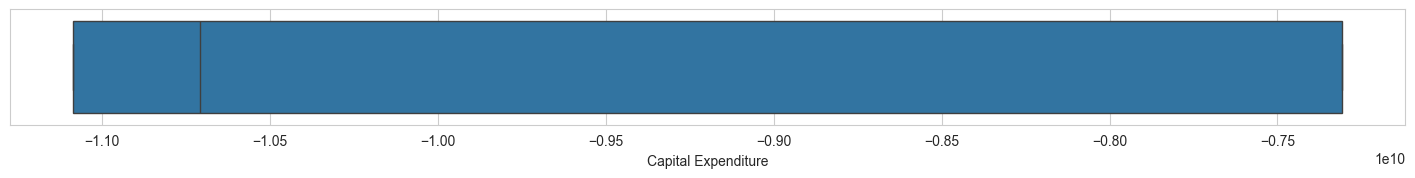

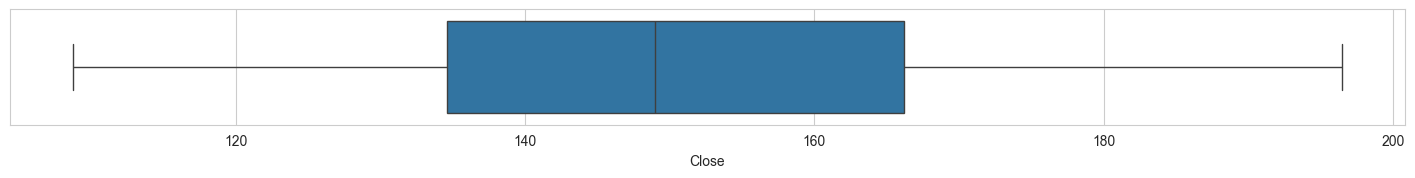

In [38]:
# Boxplot before handling outliers
for column in selected_stock_df:    
    fig, ax = plt.subplots(figsize=(18,1.5))
    sns.boxplot(data=selected_stock_df, x=column)

# Normalization

In [39]:
def min_max_normalize(df):
  for column in df.columns:
    if column != "Close":
      df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  return df

In [40]:
# Apply min-max normalization
df_normalized = selected_stock_df.copy()
df_normalized = min_max_normalize(df_normalized)

# Split Data

In [41]:
train_data = df_normalized.iloc[:-30]
test_data = df_normalized.iloc[-30:]

In [42]:
train_data.shape

(725, 13)

In [43]:
test_data.shape

(30, 13)

# VAR Model

## Check If Data Is Stationary

In [44]:
def adfuller_test(series, column_name):
    significane_level = 0.05
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{column_name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {significane_level}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= significane_level:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [45]:
# ADF Test on each column
for name, column in selected_stock_df.items():
    adfuller_test(column, name)
    print('\n')

    Augmented Dickey-Fuller Test on "Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1894
 No. Lags Chosen       = 0
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.2101. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.038
 No. Lags Chosen       = 1
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.2702. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

## Make Data Stationary By Conducting Differencing

In [504]:
df_differenced = selected_stock_df.diff().dropna()

In [550]:
# Re-run ADF Test on each column
for name, column in df_differenced.items():
    adfuller_test(column, name)
    print('\n')

    Augmented Dickey-Fuller Test on "Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -32.2989
 No. Lags Chosen       = 0
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -28.5139
 No. Lags Chosen       = 0
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05

## Make prediction for the last 30 days

In [46]:
model = VAR(train_data)
fitted_model = model.fit()
lag_order = fitted_model.k_ar

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
forecast = fitted_model.forecast(train_data.values[-lag_order:], steps=30)

In [48]:
# Create a DataFrame with predicted values and maintain the date index
pred_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

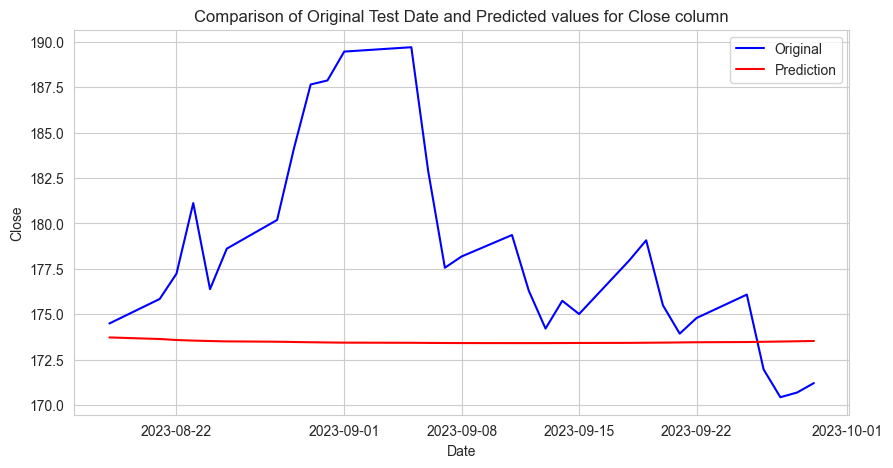

In [49]:
# Plotting the reverse differenced Close column to plot original data
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['Close'], label='Original', color='blue')
plt.plot(pred_df.index, pred_df['Close'], label='Prediction', color='red')

# Customize the plot
plt.title('Comparison of Original Test Date and Predicted values for Close column')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Show the plot
plt.show()

In [50]:
# Metrics for testing evaluation
mse = metrics.mean_squared_error(test_data, pred_df)
rmse = metrics.mean_squared_error(test_data, pred_df, squared=False)
mae = metrics.mean_absolute_error(test_data, pred_df)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 3.78007877237479
Root Mean Squared Error: 0.597119792776569
Mean Absolute Error: 0.45553919204732385
